**Facilities**
The data set we will be pulling from for this section is the 'City Facilities' CSV, which is data pulled from the Operations Management System for the Department of Public Works. This data set provides us with a number of useful categories: facility name, neighborhood, type of facility, logitude/latitude, and even images of each. We will mostly be using facility type and neighborhood, as these categories lend themselves the strongest to our mission of determining the best neighborhood in Pittsburgh.

If we're judging the best neighborhood by how many public services it provides, the amount of facilities each neighborhood has is a good quantifier of this.


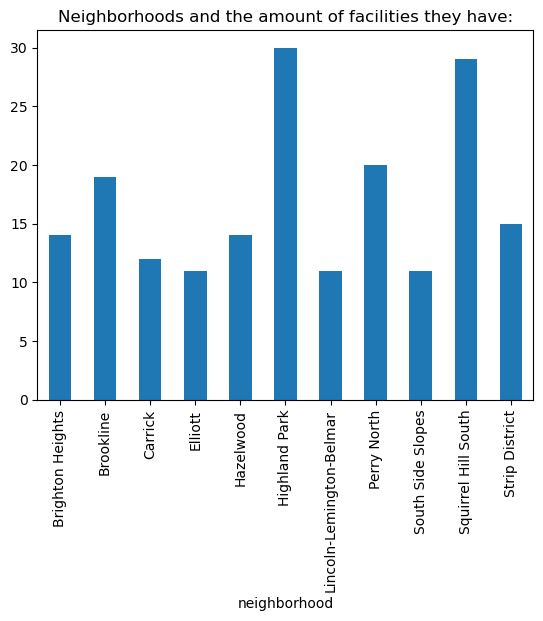

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("https://data.wprdc.org/datastore/dump/fbb50b02-2879-47cd-abea-ae697ec05170")
facility = data.groupby("neighborhood")
facility_amt = facility.size()
amt_query_mask = facility_amt > 10
facility_amt[amt_query_mask].plot.bar(title="Neighborhoods and the amount of facilities they have:")
# CHANGE AXIS LATER
plt.show()

Of all the neighborhoods in Pittsburgh, just 11 of them have more than 10 public facilities.

In case you don't want to crane your neck, those 2 big bars are Squirrel Hill South and Highland Park, both of which are coming in at a whopping [INSERT AMOUNT OF FACILITIES].


But what if some facilities are worth more than others? A police station typically will offer more public service than something like a bathroom. Let's see which neighborhood has the most of some different types of facilities. First, let's get a list of all the types of facilities there are. 

In [10]:
facility_type = data.groupby("type")
print(facility_type.size())

type
Activity         18
Cabin             4
Community         3
Concession       32
Dugout           42
Firehouse        28
Medic Station    11
OFFICE            2
Office           23
POLICE            7
Police            8
Pool             26
Pool Closed       4
Pool/Rec          6
Rec Center        6
Recycling         3
Restrooms        18
SERVICE           3
STORAGE           6
Salt Dome         8
Senior           16
Service          27
Shelter          62
Storage          24
TRAINING          2
Training          2
Utility          20
Vacant            1
dtype: int64


Some of these definately look like they are more important than others. Let's look at 5 main ones: police stations, fire houses, medic stations, pools, rec centers, and shelters. This is a good combination of practical facilities like the police and recreational ones like a pool.

We'll go in order. First are the police stations.

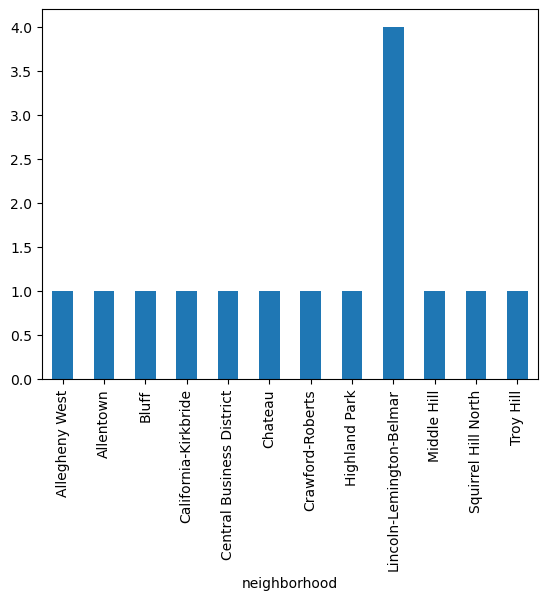

In [4]:
# trying to display the top neighborhood of each type of facility
# best to do one at a time, ill start w police

police_query_mask = data["type"] == "Police"
POLICE_query_mask = data["type"] == "POLICE"

police_facility = data[police_query_mask | POLICE_query_mask]
police_facility = police_facility.groupby("neighborhood").size()
police_facility.plot.bar()
plt.show()
#TODO: Label Graphs More

Out of the 12 neighborhoods with police stations, only one neighborhood has more than 1 station: Lincoln-Lemington-Belmar. If you remember, this neighborhood was also in the previous list of neighborhoods with more than 11 facilities. Maybe we'll keep an eye on this one.

Let's look at more data now, starting with firehouses.

In [5]:
firehouse_query_mask = data["type"] == "Firehouse"

fire_facility = data[firehouse_query_mask]
fire_facility = fire_facility.groupby("neighborhood").size()
fire_facility.head(28)
#fire_facility.plot.bar()
#plt.show()
#TODO: Change scaling of Y axis 

neighborhood
Beechview                   1
Bluff                       1
Brighton Heights            1
Brookline                   1
Carrick                     1
Central Oakland             1
East Allegheny              1
East Liberty                1
Elliott                     1
Greenfield                  1
Hays                        1
Hazelwood                   1
Homewood South              1
Lincoln-Lemington-Belmar    1
Lower Lawrenceville         1
Manchester                  1
Marshall-Shadeland          1
Mount Washington            1
Perry North                 1
Sheraden                    1
South Side Flats            1
South Side Slopes           1
Spring Hill-City View       1
Stanton Heights             1
Strip District              1
Swisshelm Park              1
West Oakland                1
Westwood                    1
dtype: int64

Since all the neighborhoods that have a firehouse only have 1, we don't need to make a graph. We'll keep in mind if the neighborhood has a firehouse when determining the best one.

Our next stop is the Medic Stations.

In [6]:
medic_query_mask = data["type"] == "Medic Station"

medic_facility = data[medic_query_mask]
medic_facility = medic_facility.groupby("neighborhood").size()
medic_facility.head(12)
#fire_facility.plot.bar()
#plt.show()
#TODO: Change scaling of Y axis 

neighborhood
Allentown                    1
Bloomfield                   1
Central Business District    1
Garfield                     1
Homewood West                1
Knoxville                    1
Marshall-Shadeland           1
Perry South                  1
Shadyside                    1
West End                     1
dtype: int64

Same story as before, but there's much less medic stations than fire houses.

Let's go onto the recreational ones, starting with pools. Since there is a category for pool/rec center in the data sheet, I will be counting each of these facilities for both pool and rec center.

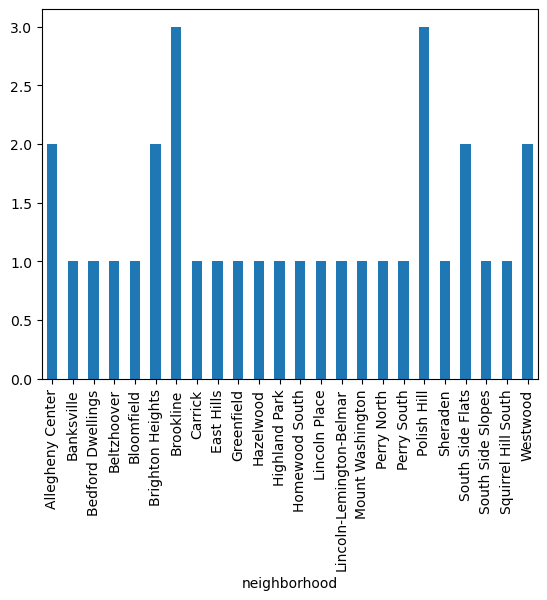

In [7]:
pool_query_mask = data["type"] == "Pool"
poolrec_query_mask = data["type"] == "Pool/Rec"

pool_facility = data[pool_query_mask | poolrec_query_mask]
pool_facility = pool_facility.groupby("neighborhood").size()
pool_facility.plot.bar()
plt.show()

This graph is a little messy, but it shows which ones have the most pools ...

Now, how does all of this add up? We saw the neighborhoods with the most amount of every facility, and neighborhoods with the most amount of a single facility, but we can do better.  

Let's make a graph, but taking out a bunch of the columns that aren't as important or impactful. Things like offices and storage areas, while nice for the people who use them, do not neccessarily directly benefit the community they are located in. So, let's remove every building that does not directly impact the community. Here are the categories we will remove: OFFICE, Office, Salt Dome, TRAINING, Training, Pool Closed, Vacant, Storage, STORAGE, SERVICE, Service

If you'd like a more in depth explanation on why I cut out some things but kept some others, feel free to ask. 

In [8]:

data_type = data.groupby("type")
data_type.head()
#facility_amt = facility.size()
#amt_query_mask = facility_amt > 10
#facility_amt[amt_query_mask].plot.bar(title="Neighborhoods and the amount of facilities they have:")
# CHANGE AXIS LATER
#plt.show()

,_id,id,parcel_id,inactive,name,rentable,type,primary_user,address_number,street,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,650726265,120-J-300,f,57th Street Park Building,f,Storage,Department of Public Works,NaN,57TH ST,...,Upper Lawrenceville,7,10.0,42003101100,2.0,10.0,2.0,3-5,40.485666,-79.946450
1,2,783044037,2-H-284,f,Albert Turk Graham Park Shelter,f,Shelter,Department of Public Works,39.0,VINE ST,...,Crawford-Roberts,6,3.0,42003030500,3.0,3.0,2.0,2-1,40.440458,-79.984104
2,3,1997158435,23-R-157,f,Allegheny Northside Senior Center and Hazlett ...,t,Senior,CitiParks,5.0,ALLEGHENY SQ E,...,Allegheny Center,1,22.0,42003562700,1.0,22.0,1.0,1-6,40.453099,-80.005343
3,4,204824684,10-F-198,f,Ammon Recreation Center,f,Pool,CitiParks,2217.0,BEDFORD AVE,...,Bedford Dwellings,6,5.0,42003050900,3.0,5.0,2.0,2-5,40.448735,-79.977856
4,5,472140955,013-K-314,f,Arlington Field Lights Building,f,Utility,CitiParks,0.0,STERLING ST,...,South Side Slopes,3,16.0,42003160800,3.0,16.0,3.0,4-22,40.418152,-79.974471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,1985439358,82-H-1-0-2,f,Police Firing Range Building,f,POLICE,PUBLIC SAFETY,NaN,WASHINGTON BLVD,...,Lincoln-Lemington-Belmar,9,12.0,42003981800,2.0,12.0,5.0,3-15,40.479390,-79.906488
389,390,1095769060,82-H-1-0-2,f,Police Firing Range Observation Tower,f,POLICE,PUBLIC SAFETY,NaN,WASHINGTON BLVD,...,Lincoln-Lemington-Belmar,9,12.0,42003981800,2.0,12.0,5.0,3-15,40.479826,-79.906244
390,391,418959764,82-H-1-0-2,f,Police Firing Range Storage Shed,f,POLICE,PUBLIC SAFETY,NaN,WASHINGTON BLVD,...,Lincoln-Lemington-Belmar,9,12.0,42003981800,2.0,12.0,5.0,3-15,40.480209,-79.906015
394,395,1050393680,82-H-1-0-2,f,Public Safety Training Center Classroom Trailer,f,OFFICE,PUBLIC SAFETY,NaN,WASHINGTON BLVD,...,Highland Park,9,11.0,42003980100,2.0,11.0,5.0,3-12,40.471018,-79.909185


And, if we want to see just the MOST important buildings (the ones that we deem to provide the most value to the community), we can do that too. For this one, we'll remove these categories: Concession, Dugout, Shelter, Cabin, Restrooms, Utility

Again, if you want to know why we removed some things but not others, feel free to ask.

With just the categories that we have deemed most important, these are top neighborhoods. As you can see, __ is the community with the greatest number of relevent buildings. Some of these top neighborhoods also have a lot of important buildings, like __ having a lot of __. This isn't the only data we are judging these neighborhoods on, though; there are data sets that will give us a clearer picture on which neighborhood is the best one.

Why it was removed:
OFFICE, Office: random stuff that doesn't really affect people, like public services admin building, doesnt help too much
Concessions: doesn't really help, it's nice but it's not very impactful. same with dugouts and shelters. 
Pool Closed: a pool that's closed bears no swimmers.
Restrooms: Again, while nice, doesn't have enough of an impact.
Service, SERVICE: Similar to office. Things like maintenence buildings for people who maintain things. The place these facilities are in doesn't affect the community much.
Vacant: self explanatory
Storage: Not something a neighborhood uses, mostly just the government.